In [1]:
imatlab_export_fig('print-png');

# 哈希函数

In [2]:
a = java.security.MessageDigest.getInstance('sha-256');
str = '12';
%若unicode可以用unicode2native函数转码，或者直接用java.lang.String的getBytes
a.update(uint8(str))
output_int = a.digest;
output_uint = typecast(output_int,'uint8');
[output_int, output_uint]
strMD5 = sprintf('%02X', output_uint)
length(strMD5) ./ 2


ans =

  32x2 int8 矩阵

    107    107
     81     81
    -44    127
     49     49
    -33    127
     93     93
    127    127
     20     20
     28     28
    -66    127
    -50    127
    -52    127
     -9    127
    -98    127
    -33    127
     61     61
    -40    127
     97     97
    -61    127
    -76    127
      6      6
    -97    127
     11     11
     17     17
    102    102
     26     26
     62     62
    -17    127
    -84    127
    -69    127
    -87    127
     24     24


strMD5 =

    '6B51D431DF5D7F141CBECECCF79EDF3DD861C3B4069F0B11661A3EEFACBBA918'


ans =

    32



## 生成混沌序列密钥

In [3]:
x_0 = 0;
y_0 = 0.25;
u_0 = 0.5;
r_0 = 0.75;

temp = output_uint(1);
for index = 2:8
    temp = bitxor(temp, output_uint(index));
end
x = x_0 + mod(double(temp) / 256, 1);

temp = output_uint(9);
for index = 10:16
    temp = bitxor(temp, output_uint(index));
end
y = y_0 + mod(double(temp) / 256.0, 1);

temp = output_uint(17);
for index = 18:24
    temp = bitxor(temp, output_uint(index));
end
u = mod(u_0 + double(temp) / 256.0, 1);

temp = output_uint(25);
for index = 26:32
    temp = bitxor(temp, output_uint(index));
end
r = mod(r_0 + double(temp) / 256.0, 1);


In [4]:
[x, y, u, r]


ans =

    0.2109    0.4180    0.8008    0.7930



In [5]:
%% 改进一维 Logistic 映射算法
%% 参数取值与系统特征
count_dot = 200; % 每一个控制参量的采样点数
N = 50; % 预迭代次数

% x = 0.2; % 初值x
r = 1; % 控制参量r
list = 0:0.01:1; % 控制参量r
u = 0.5; % 控制参量u

iteration_rst_cell = cell(length(list), 1);
for index = 1:length(list)
    x = list(index);
    iter = pkg.iterator.LogisticSineIterator(x, 'r', r, 'u', u, 'N', N);
    iteration_rst_cell{index} = iter.getMat(count_dot, 1);
end

x_coord = zeros(length(r) * count_dot, 1); % 散点图横坐标
y_coord = zeros(size(x_coord)); % 散点图纵坐标
for index = 1:length(list)
    x_coord((1 + (count_dot * (index - 1))):(count_dot * index)) = index;
    y_coord((1 + (count_dot * (index - 1))):(count_dot * index)) = iteration_rst_cell{index};
end

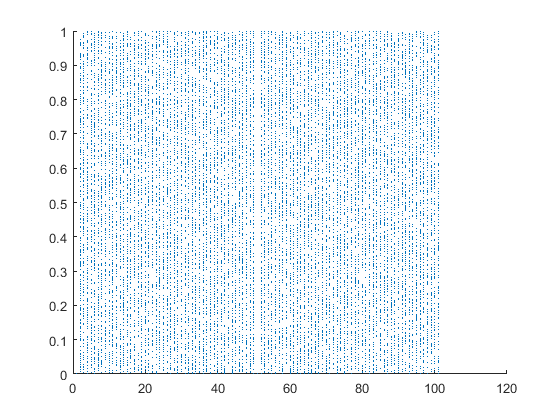

In [6]:
%% 绘图
figure; % 打开新图窗
% c = linspace(1,10,length(x_coord)); % 渐变色
scatter(x_coord, y_coord, 1, 'filled'); % 绘制散点图
% scatter(x_coord, y_coord, 1, c, 'filled'); % 绘制散点图
% axis([0 5 0 1]); % 自定义坐标轴范围

# 混沌序列

## 初值敏感性验证

In [7]:
%% 初值敏感性验证
% 两个相差 2^(-49) 的初值多次迭代后的值(控制参量为 4-2^(-50))
iteration_rst = [pkg.cipher.logisticImproved(0.6 + 2^(-50), 100), pkg.cipher.logistic(0.6 - 2^(-50), 100)]


iteration_rst =

    0.2400    0.9600
    0.3824    0.1536
    0.7469    0.5200
    0.3256    0.9984
    0.9592    0.0064
    0.5793    0.0255
    0.3772    0.0993
    0.9652    0.3577
    0.6817    0.9190
    0.1292    0.2979
    0.7083    0.8366
    0.0903    0.5469
    0.5368    0.9912
    0.1955    0.0349
    0.0616    0.1348
    0.3807    0.4664
    0.5625    0.9955
    0.5403    0.0180
    0.3808    0.0706
    0.6078    0.2625
    0.3793    0.7744
    0.5344    0.6987
    0.6979    0.8420
    0.7225    0.5321
    0.6357    0.9959
    0.9747    0.0164
    0.9520    0.0645
    0.2579    0.2412
    0.4064    0.7321
    0.9784    0.7846
    0.3114    0.6761
    0.4840    0.8760
    0.4856    0.4345
    0.6318    0.9828
    0.0998    0.0675
    0.6328    0.2519
    0.2956    0.7538
    0.8439    0.7422
    0.2463    0.7653
    0.0707    0.7185
    0.2344    0.8090
    0.6231    0.6182
    0.7919    0.9441
    0.5403    0.2110
    0.3875    0.6659
    0.2829    0.8899
    0.8285    0.

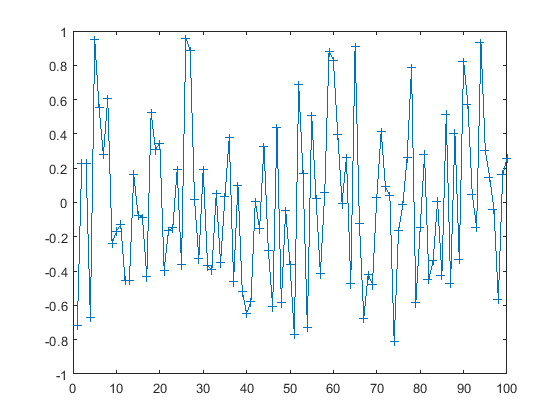

In [8]:
%% 绘制每次迭代时两个相近初值的系统的差
figure;
plot(iteration_rst(:, 1) - iteration_rst(:, 2), '-+');

## 概率统计分布特性分析

In [9]:
%% 概率统计分布特性分析
iter = pkg.iterator.LogisticSineIterator(0.25, 'r', 1, 'u', 0.3, 'N', 50);
iteration_rst_distribution = iter.getMat(1000000, 1); % 用于统计分布特性的迭代结果

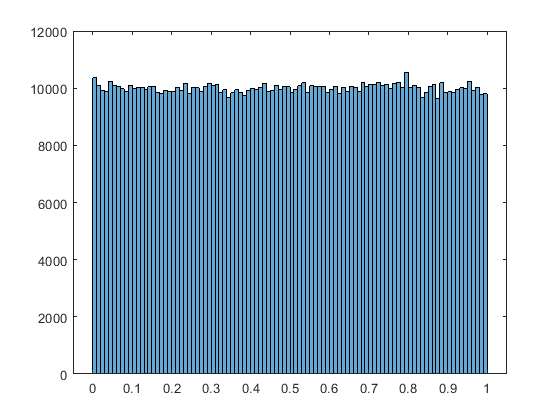

In [10]:
%% 绘制反映分布特性的直方图
figure;
histogram(iteration_rst_distribution(101:end), 100); % 绘制统计分布直方图

# 加密

In [11]:
plainImage_0 = pkg.Image('.\images\Lena.tiff');
iter1 = pkg.iterator.LogisticSineIterator(0.25);
iter2 = pkg.iterator.LogisticSineIterator(0.75);
cipherImage = pkg.cipher.encrypt(plainImage_0, iter1, iter2);

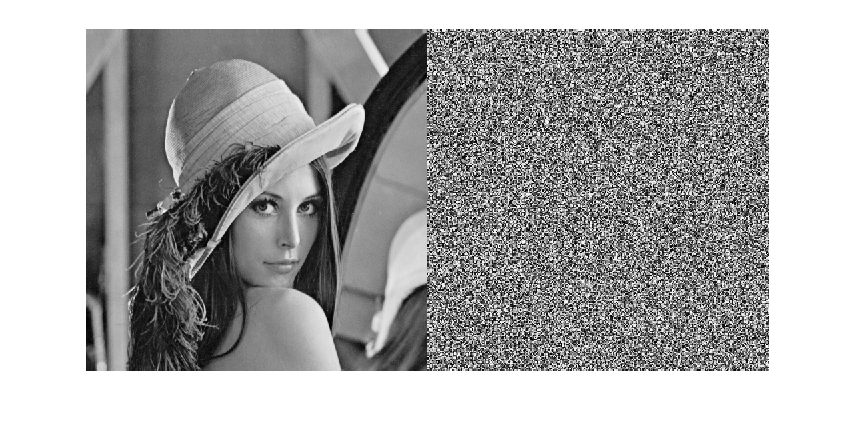

In [12]:
close all;
figure;
set(gcf, 'outerposition', [1 1 1080 1920]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
imshowpair(plainImage_0.gray_img, cipherImage.gray_img,'montage');  % 并列显示图像

# 解密

In [13]:
iter1.init();
iter2.init();
plainImage_1 = pkg.cipher.decrypt(cipherImage, iter1, iter2);

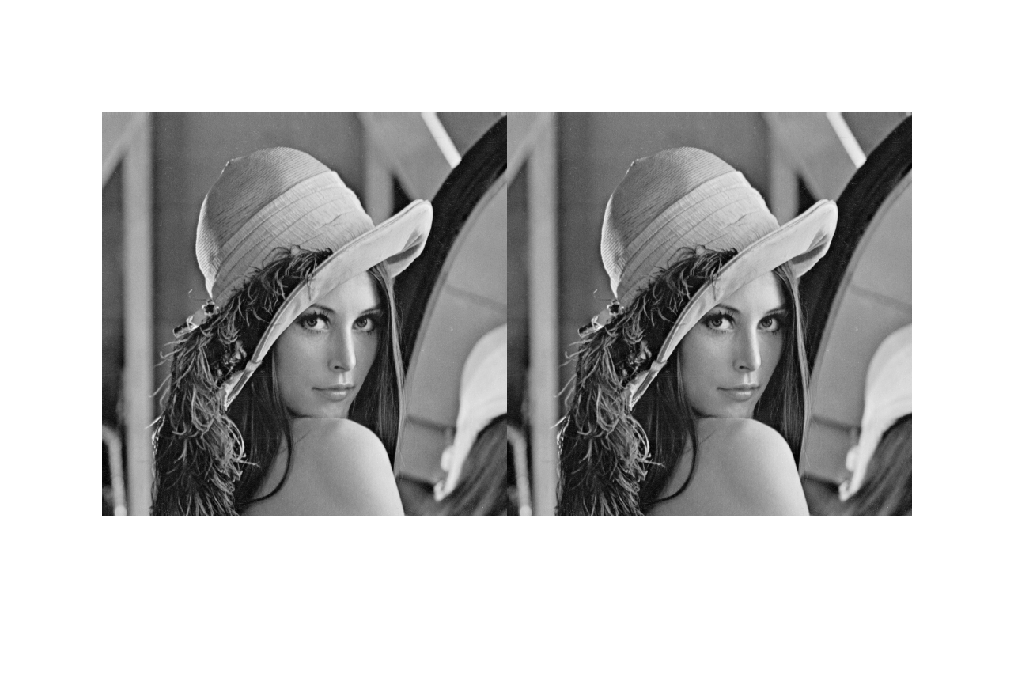

In [14]:
close all;
figure;
set(gcf, 'outerposition', [1 1 1080 1920]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
imshowpair(plainImage_0.gray_img, plainImage_1.gray_img,'montage');  % 并列显示图像

In [15]:
for index_i = 1:512
    for index_j = 1:512
        if plainImage_0.gray_img(index_i, index_j) ~= plainImage_1.gray_img(index_i, index_j)
            disp([index_i, index_j, plainImage_0.gray_img(index_i, index_j), plainImage_1.gray_img(index_i, index_j)]);
        end
    end
end

In [16]:
for index = 1:8
    sum(plainImage_0.bit_plane(:, :, index) ~= plainImage_1.bit_plane(:, :, index), 'all')
end


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0

